<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_Problema_de_la_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de la mochila

El problema de la mochila consiste en conseguir el precio máximo optimizando la cantidad de objetos colocados dentro de una "mochila".

Este problema es uno de los 21 problemas NP-completos establecidos en un articulo de 1972 y además tiene muchos tipos de soluciones pero en este informe veremos la solución con programación dinámica y la solución que hace uso de la elección de greedy.

Para este problema necesitaremos la capacidad máxima de la mochila y dos secuencias de datos las cuales contendrán el peso de cada objeto y el valor correspondiente.

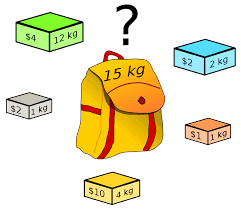

#2. Descripción de los algoritmos

##2.1. Algoritmo con programación dinámica.

Al estar tratando con un problema de optimización necesitamos verificar todos los posibles casos que nos podemos encontrar para ubicar la mejor solución a nuestra problematica, por esta misma razón van a ocurrir situaciones en las cuales se nos repetirán casos que habremos calculado con anterioridad y para no resolverlos nuevamente haremos uso de programción dinámica con una sub estructura óptima la cual irá almacenando los casos calculados previamente y así disminuir la commplejidad de nuestro algoritmo.

###Subestructura optima:
Para que la subestructura óptima nos ayude a optimizar el valor máximo colocado dentro de la mochila, la definiremos del siguiente modo:

$K[i,W] = \begin{cases}
0 & \text{Si i = 0 || W = 0} \\
K[i - 1, W] & \text{Si wt[i - 1] > W} \\
max(K[i - 1, W], K[i - 1,W - wt[i - 1]] + val[i - 1]) & \text{Si wt[i - 1] ≤ W}
\end{cases}$

Lo primero que realizará el algoritmo será generar nuestra subestructura óptima la cual viene siendo una matriz de tamaño $n * W$, luego irá verificando caso por caso si el objeto con peso $wt[i - 1]$ es menor al peso máximo de la mochila, si ocurre ese caso se almacena en la matriz en la posición $K[i][W]$ (donde $i$ representa el objeto y $W$ el peso máximo en ese caso) el valor máximo entre $val[i - 1] + K[i - 1][W -wt[i - 1]]$ y $K[i - 1][W]$, esto quiere decir que el algoritmo debe decidir entre tomar el valor actual o un caso adyacente ya calculado previamente, en caso de que el peso del objeto actual sea mayor al peso máximo, se almacena en la matriz con posición $K[i - 1][W]$ el valor adyacente ya calculado, osea $K[i - 1][W]$ para luego al finalizar retornar la última posición de nuestra matriz, la cual corresponde a $K[n][W_{max}]$.

##2.1.1. Código

In [1]:
import random
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat

In [2]:
def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

In [16]:
def knapSackDynamic(wt, val, W, n, verbose = False):
    if verbose:
        print("Función knapSackDynamic()")
        print("Entrada:")
        print("Peso total:", W)
        print("Pesos:", wt)
        print("Valores:", val)
        print("")
        print(f"Se genera la matriz de n * W\n")

    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
    cont = 0

    if verbose:
        print(f"Se verifican los casos que consiguen el valor máximo.\n")

    for i in range(n + 1):
        for w in range(W + 1):
            cont += 1

            if verbose:
                print(f"Se verifica el caso base:")
                print(f"no hay objetos o el peso = 0\n")
            if i == 0 or w == 0:
                K[i][w] = 0

            elif wt[i-1] <= w:
                if verbose:
                    print(f"Se verifica si el caso actual:")
                    print(f"Peso objeto = {wt[i - 1]} <= Peso máximo = {w}?")
                    
                if verbose:
                    print(f"Se verifica el valor actual o casos adyacentes.")
                    print(f"valor actual = {val[i-1] + K[i-1][w-wt[i-1]]}, valor calculado previamente = {K[i-1][w]}")

                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])

            else:
                if verbose:
                    print(f"Peso excede el máximo, se almacena el caso adyacente")
                    print(f"Caso calculado = {K[i-1][w]}")
                K[i][w] = K[i-1][w]
    
    if verbose: 
        print(f"\nSalida = {K[n][W]}")
    return K[n][W], cont

##2.2. Algoritmo de greedy

El algoritmo de greedy o también conocido como algoritmo voraz es una estrategia de busqueda la cual busca elegir la opción más optima en cada paso local con la esperanza de llegar a una solución local, el problema que tiene este algoritmo es que al intentar buscar soluciones optimas locales no verifica otros posibles camino los cuales pueden obtener una mayor optimización para nuestro problema.

La entrada de nuestro algoritmo son dos secuencias de números $[w_1, w_2, ..., w_i]$ y $[v_1, v_2, ..., v_i]$ los cuales representan los pesos ($w_i$) y valores ($v_i$) de cada objeto, la cantidad de objetos $W$ y la capacidad máxima de la mochila.

A diferencia de la programación dinámica, en este algoritmo necesitaremos saber cual es el objeto que nos optimizará más el peso en comparación a su precio, para esto necesitaremos dos arreglos, los cuales almacenarán el ratio entre el precio de cada objeto con su valor correspondiente y por último necesitaremos un arreglo de indices los cuales nos ayudará a no perder la posición de cada objeto ya que el siguiente paso consiste en ordenar el arreglo de retios de mayor a menor para luego ir almacenando los objetos con mayor ratio dentro de nuestra mochila retornado el valor máximo obtenido.

##2.2.1. Código

In [4]:
def partition(array, array2, low, high):
    pivot = array[high]
    i = low - 1

    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
            (array2[i], array2[j]) = (array2[j], array2[i]) 

    (array2[i + 1], array2[high]) = (array2[high], array2[i + 1])
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    return i + 1
 
def quickSort(array, array2,low, high):
    if low < high:
 
        pi = partition(array, array2,low, high)
        quickSort(array, array2, low, pi - 1)
        quickSort(array, array2, pi + 1, high)

In [5]:
def knapsackGreedy(wt, val, W, n, verbose= False): 
    if verbose:
        print("Función knapsackGreedy()")
        print("Entrada:")
        print(f"Valores = {val}")
        print(f"Pesos = {wt}")
        print(f"Peso máximo = {W}\n")
        print("Se incializan los arreglos auxiliares...\n")
    ratio = [0 for i in range(0,n)]
    idx = [i for i in range(0, n)]

    if verbose:
        print("Se calcula el ratio de cada objeto...")
    for i in range(0, n):
        ratio[i] = val[i] / wt[i]

    if verbose:
        print(f"Ratios por objetos = {ratio}\n")
        print("Se ordenan el ratio con los indices correspondientes...")
    quickSort(ratio, idx, 0, n - 1)
    

    if verbose:
        print("Se verifican si los objetos caben dentro de la mochila")
    iteraciones = 0
    max = 0
    for i in idx:
        iteraciones += 1 
        if verbose:
            print(f"Peso objeto = {wt[i]} <= Peso máximo = {W}?")
        if wt[i] <= W:
            max += val[i]
            W -= wt[i]
    
    if verbose:
        print("")
        print(f"Precio máximo calculado = {max}")

    return max, iteraciones

##2.3. Ejecución del algoritmo dinamico paso a paso (Verbose = True)

In [11]:
W, val, wt = knapsack_instance_generator(5)
n = len(val)
print(f"Peso máximo = {W}")
print(f"Valores = {val}")
print(f"Pesos = {wt}")

Peso máximo = 44
Valores = [90, 118, 131, 189, 241]
Pesos = [10, 19, 17, 19, 24]


In [19]:
valorMax, cont = knapSackDynamic(wt, val, W, n, verbose= True)

Función knapSackDynamic()
Entrada:
Peso total: 50
Pesos: [10, 20, 30]
Valores: [60, 100, 120]

Se genera la matriz de n * W

Se verifican los casos que consiguen el valor máximo.

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay objetos o el peso = 0

Se verifica el caso base:
no hay obj

##2.4. Ejecución del algoritmo de greedy paso a paso (Verbose = True)

In [21]:
valorMax, cont = knapsackGreedy(wt, val, W, n, verbose= True)

Función knapsackGreedy()
Entrada:
Valores = [60, 100, 120]
Pesos = [10, 20, 30]
Peso máximo = 50

Se incializan los arreglos auxiliares...

Se calcula el ratio de cada objeto...
Ratios por objetos = [6.0, 5.0, 4.0]

Se ordenan el ratio con los indices correspondientes...
Se verifican si los objetos caben dentro de la mochila
Peso objeto = 30 <= Peso máximo = 50?
Peso objeto = 20 <= Peso máximo = 20?
Peso objeto = 10 <= Peso máximo = 0?

Precio máximo calculado = 220


#3. Tiempo de ejecución

##3.1. Algoritmo Dinámico.

###Teorema (Tiempo de ejecución).

El tiempo de ejecución del algoritmo dinámico es de $O(n * W)$.

##3.2. Algoritmo de greedy.

###Teorema (Tiempo de ejecución).

El tiempo de ejecución de este algoritmo es de $O(n*log(n))$

Para calcular el tiempo de ejecución de este algoritmo primero definiermos una función $T(n)$ la cual contendrá todos los procesos realizados por nuestro algoritmo.

En este caso nuestra función quedaría definida de la siguiente manera:

$T(n) = O(n * log(n)) + O(n)$

donde $O(n * log(n))$ corresponde al tiempo de ejecución de la función de ordenamiento y $O(n)$ corresponde al tiempo de ejecución del ciclo que se encarga de buscar la cantidad máxima de objetos que pueden entrar en la mochila.
Por lo tanto teniendo en cuenta estos factores pordemos considerar que la complejidad temporal de nuestro algoritmo de greedy en su caso promedio es de $O(n * log(n))$.

Para añadir se debe considerar que el caso promedio de este algoritmo corresponde netamente al tiempo de ejecución del metodo de ordenamiento, por lo tanto si es que se logra tocar el peor caso de este, la complejidad temporal del algorimo aumenta a $O(n^2)$.

#4. Correctitud

## **Teorema (Correctitud).**

El algoritmo genera un conjunto de objetos donde dichos objetos parten del conjunto original, que representa el maximo valor resultante que puede alcanzar el problema.

### Prueba del Teorema

**Inicializacion**

Antes de la primera iteracion inicializamos una matriz $K$ con 0 en todos sus espacios. Esto quiere decir que al ingresar en la posicion $K[i][w]$ siendo w es el peso del objeto, tendra como valor la maxima ganancia encontrada por lo que cumple la propiedad.

**Mantencion**

Al comienzo de cada i-esima iteracion el elemento $K(i,w)$ , siempre almacenara la cantidad maxima de ganancia posible para el subproblema resuleto en ese momento. 

Durante esta i-esima iteracion tenemos dos casos posibles:

1. Si $wt[i - 1] <= w$ siendo "$wt$" el arreglo de pesos, $K[i][w]$ contendra en su interior el maximo resultado entre $val[i - 1] + K[i - 1][w -wt[i - 1]]$ siendo val el arreglo de valores.

2. Caso contrario donde $wt[i - 1] > w$, $K[i][w]$ contendra en su interior el maximo resultado, esto quiere decir $K[i - 1][w]$.

Dado que en cada caso la posicion anteriormente vista almacena siempre la maxima ganancia hemos  comprobado que la propiedad es verdadera.

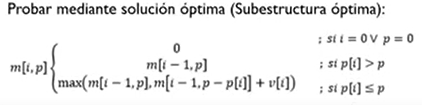

###**Por qué el algoritmo greedy no retorna el resultado optimo?**

El algoritmo Greddy/Voraz tal como hablamos al comienzo del informe funciona por medio de considerar resultados locales como globales es decir como un resultado optimo, es por ello la dificultad que tiene este de encontrar la mejor optimizacion, viendolo desde el problema de la mochila este algoritmo agrega a la ganancia los objetos que tengan una mejor proporcion valor/peso. Sin embargo si durante las iteraciones se encuentra un objeto que sobrepasa la capacidad deja este de ser evaluado dentro del conjunto de optimizaciones, saltandose posibles objetos que si podian de ser agregados.



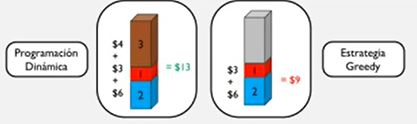

#5. Experimentos

##5.1. Algoritmo de greedy vs dinámico

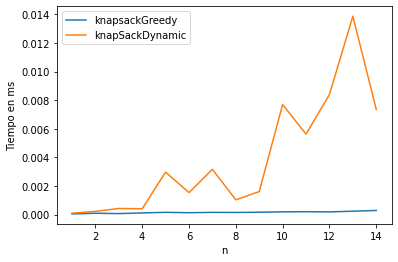

In [27]:
x=[]
y_Dynamic = []
y_Greedy = []

for n in range(1,15):
  W, val, wt = knapsack_instance_generator(n)
  
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import knapSackDynamic", stmt=f"knapSackDynamic({wt},{val},{W},{n})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces corteDeVarillaRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t_Greedy = repeat(setup="from __main__ import knapsackGreedy", stmt=f"knapsackGreedy({wt},{val},{W},{n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_Greedy.append(t_Greedy)

plt.plot(x,y_Greedy)
plt.plot(x,y_Dynamic)
plt.legend(["knapsackGreedy","knapSackDynamic"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar en el grafico anterior, el tiempo de ejecución del algoritmo dinámico es mayor que el del algortimo de greedy, esto ocurre ya que la complejidad temporal del código dinámico es $O(n*W)$ y como este depende del peso máximo la complejidad temporal se puede disparar o puede disminuir en gran medida, en cambio el algoritmo de Greedy consigue un tiempo de ejecución mucho menor por el hecho de que depende únicamente de la cantidad de objetos que se desea optimizar con una complejidad de $O(n*log(n))$, el problema de este algoritmo es que no siempre conseguirá la solución optima ya que no verifica todos los posibles casos como si lo realiza el código dinámico.

##5.1. Cantidad de SubProblemas resueltos

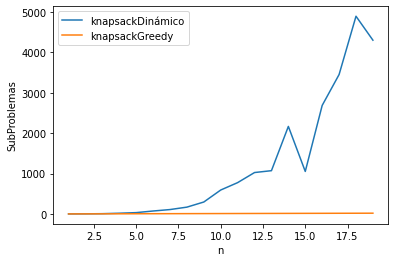

In [ ]:
y_Dynamic = []
y_Greedy = []
x = []

for n in range(1,20):
    W, val, wt = knapsack_instance_generator(n)

    valor1, cont1 = knapSackDynamic(wt, val, W, n)
    valor2, cont2 = knapsackGreedy(wt, val, W, n)

    y_Dynamic.append(cont1)
    y_Greedy.append(cont2)
    x.append(n)

plt.plot(x, y_Dynamic)
plt.plot(x, y_Greedy)
plt.legend(["knapsackDinámico", "knapsackGreedy"])

plt.xlabel("n")
plt.ylabel("SubProblemas")
plt.show()

Como se puede apreciar en el gráfico anterior, la cantidad de sub-problemas resueltos por el algoritmo dinámico sigue siendo mayor al algoritmo de greedy, esto sigue ocurriendo por la misma razón explicada en el experimento anterior y en la correctitud.

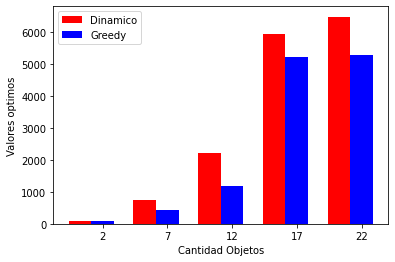

In [42]:
import numpy as np

y_Dynamic = []
y_Greedy = []
x = []

for n in range(2, 25, 5):
    W, val, wt = knapsack_instance_generator(n)

    valor1, cont1 = knapSackDynamic(wt, val, W, n)
    valor2, cont2 = knapsackGreedy(wt, val, W, n)

    y_Dynamic.append(valor1)
    y_Greedy.append(valor2)
    x.append(n)

indices = np.arange(len(x))
anchoBarra = 0.35

plt.xlabel("Cantidad Objetos")
plt.ylabel("Valores optimos")

plt.bar(indices, y_Dynamic, anchoBarra, color= "red", label= "Dinamico")
plt.bar(indices + anchoBarra, y_Greedy, anchoBarra, color= "blue", label= "Greedy")

plt.xticks(indices + anchoBarra, x)
plt.legend()
plt.show()



Como se puede apreciar en el gráfico anterior, los valores obtenidos por la función dinámica son mayores a los valores conseguidos por el algoritmo de greedy ya que este último no logra optimizar de la mejor manera el valor total,
a pesar de todo hay casos en donde el algoritmo de Greedy logra obtener valores muy cercano o iguales al código dinámico pero esto ocurre muy pocas veces.